# Lecture notes for 2023-11-15

## Solving first-order linear ordinary differential equations

A first-order linear ordinary differential equation has the form:
\begin{align*}
\frac{dy(x)}{dx}
+ a(x) y(a) &= f(x)
\end{align*}
where $a(x)$ and $f(x)$ are known functions that are given to us.

If we define a function $A(x)$ such that
\begin{align*}
A'(x) &= a(x)
\\
A(x) &= \int^x dt\, a(t)
\end{align*}
then, the differential equation can then be written as
\begin{align*}
\frac{dy(x)}{dx}
+ A'(x) y(a) &= f(x)
.
\end{align*}

Multiplying both sides by an integrating factor $e^{A(x)}$
$$\begin{align*}
e^{A(x)}
\left[\frac{dy(x)}{dx}
+ a(x) y(x)\right]
&=
e^{A(x)} f(x)
\\
e^{A(x)} \frac{dy(x)}{dx}
+ e^{A(x)} A'(x) y(x)
&=
e^{A(x)} f(x)
\\
e^{A(x)} \frac{dy(x)}{dx}
+ [e^{A(x)}]' y(x)
&=
e^{A(x)} f(x)
\\
[e^{A(x)} y(x)]'
&=
e^{A(x)} f(x)
\end{align*}
$$

Integrating both sides of the equation, we find
$$\begin{align*}
e^{A(x)} y(x)
&=
\int^x dt\,
e^{A(t)} f(t) + C
\end{align*}$$
where $C$ is an integration constant.  The solution of the
differential equation can be written as:
$$\begin{align*}
y(x)
&=
e^{-A(x)}
\int^x dt\,
e^{A(t)} f(t)
+ Ce^{-A(x)}
\end{align*}$$

Below is a Python code that uses `sympy` to solve the differential equation:
$$\begin{align*}
(1-x^2) y'(x) - x\,y(x) &= 3
\end{align*}$$
Note that in this case we have
$$\begin{align*}
a(x) &= - \frac{x}{1-x^2}
\\
f(x) &= \frac{3}{1-x^2}
.
\end{align*}$$


In [5]:
import sympy as sp

x, C = sp.symbols('x  C')

a = - x/(1-x**2)
f = 3/(1-x**2)

A = sp.integrate(a, x)
I = sp.integrate(sp.exp(A)*f,x)

y = sp.exp(-A)*I + C*sp.exp(-A)

print(f'a(x) = {a}')
print(f'f(x) = {f}')
print(f'A(x) = {A}')
print(f'I(x) = {I}')
print(f'y = {y}')

a(x) = -x/(1 - x**2)
f(x) = 3/(1 - x**2)
A(x) = log(x**2 - 1)/2
I(x) = -3*log(2*x + 2*sqrt(x**2 - 1))
y = C/sqrt(x**2 - 1) - 3*log(2*x + 2*sqrt(x**2 - 1))/sqrt(x**2 - 1)


## Motion of a projectile

From an $x$-momentum balance, we have:
$$
\begin{align*}
m v_x(t+\Delta t)
- m v_x(t)
&\approx
- (F_d \cos\theta)\Delta t
,
\end{align*}
$$
and from a $y$-momentum balance, we have:
$$
\begin{align*}
m v_y(t+\Delta t)
- m v_y(t)
&\approx
- (F_d \sin\theta)\Delta t
- mg \Delta t
.
\end{align*}
$$

We can write these two equations in a form that will easily allow us to
use the Euler method:
$$
\begin{align*}
v_x(t+\Delta t)
&\approx
v_x(t)
- \left(\frac{F_d}{m} \cos\theta\right)\Delta t
\\
v_y(t+\Delta t)
&\approx
v_y(t)
- \left(\frac{F_d}{m} \sin\theta + mg \right) \Delta t
\end{align*}
$$
The code that implements this is given below:


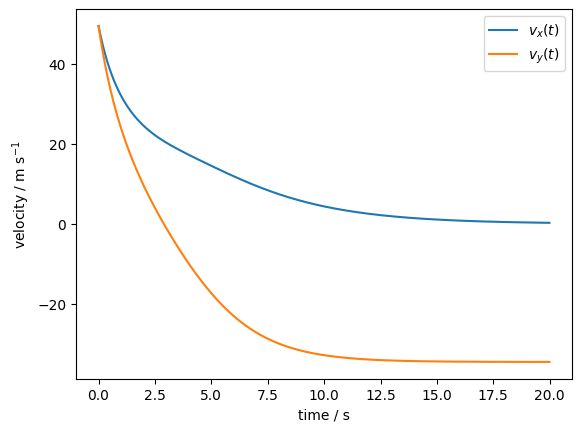

In [ ]:
import numpy as np

D = 0.04267            # diameter / m
A = np.pi*D**2/4       # cross-sectional area
g = 9.81               # acceleration due to gravity / m s^{-2}
theta0 = 45*np.pi/180  # initial angle
v0 = 70                #
rho = 1.2
Cd = 0.44              # drag coefficient
m = 45.9e-3            # mass / kg

dt = 0.01              # time step / s

vx_old = v0 * np.cos(theta0)
vy_old = v0 * np.sin(theta0)
t_old = 0
x_old = 0
y_old = 0


t_list = []
vx_list = []
vy_list = []
theta_list = []
for i in range(2000):

  v = np.sqrt(vx_old**2 + vy_old**2)
  theta = np.arcsin(vy_old/v)
  Fd = A*Cd * rho * 0.5 * v**2

  t_new = t_old + dt
  vx_new = vx_old - (Fd/m) *np.cos(theta) * dt
  vy_new = vy_old - (Fd/m*np.sin(theta) + g) * dt
  x_new = x_old + vx_old*dt
  y_new = y_old + vy_old *dt

  t_list.append(t_old)
  vx_list.append(vx_old)
  vy_list.append(vy_old)
  theta_list.append(theta*180/np.pi)

  #print(t_new, vx_new, vy_new)
  t_old = t_new
  vx_old = vx_new
  vy_old = vy_new



import pylab as plt

plt.plot(t_list, vx_list, label=r'$v_x(t)$')
plt.plot(t_list, vy_list, label=r'$v_y(t)$')
#plt.plot(t_list,theta_list)


plt.xlabel('time / s')
plt.ylabel(r'velocity / m s$^{-1}$')
plt.legend()
plt.show()

### Trajectory

To determine the trajectory of a projectile, we need to know how its
position varies with time.  In the previous code, we were able to
determine how the velocity of the projectile varied with time.  By
noting that the velocity is related to the position, we get a set of
differential equations that we can solve:
$$\begin{align*}
\frac{dx(t)}{dt} &= v_x(t)
\\
\frac{dy(t)}{dt} &= v_y(t)
.
\end{align*}
$$
These can be written in a form that can be solve using the Euler method:
$$\begin{align*}
x(t+\Delta t)
&\approx x(t) + v_x(t) \Delta t
\\
y(t+\Delta t)
&\approx y(t) + v_y(t) \Delta t
.
\end{align*}$$



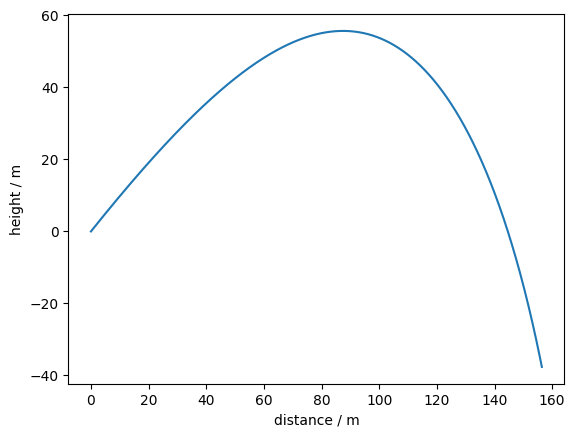

In [ ]:
import numpy as np

D = 0.04267            # diameter / m
A = np.pi*D**2/4       # cross-sectional area
g = 9.81               # acceleration due to gravity / m s^{-2}
theta0 = 45*np.pi/180  # initial angle
v0 = 70                #
rho = 1.2
Cd = 0.44              # drag coefficient
m = 45.9e-3            # mass / kg

dt = 0.01              # time step / s

t_old = 0
vx_old = v0 * np.cos(theta0)
vy_old = v0 * np.sin(theta0)
x_old = 0
y_old = 0


t_list = []
vx_list = []
vy_list = []
x_list = []
y_list = []
theta_list = []
for i in range(800):

  v = np.sqrt(vx_old**2 + vy_old**2)
  theta = np.arcsin(vy_old/v)
  Fd = A*Cd * rho * 0.5 * v**2

  t_new = t_old + dt
  vx_new = vx_old - (Fd/m) *np.cos(theta) * dt
  vy_new = vy_old - (Fd/m*np.sin(theta) + g) * dt
  x_new = x_old + vx_old*dt
  y_new = y_old + vy_old *dt

  t_list.append(t_old)
  vx_list.append(vx_old)
  vy_list.append(vy_old)
  x_list.append(x_old)
  y_list.append(y_old)
  theta_list.append(theta*180/np.pi)

  #print(t_new, vx_new, vy_new)
  t_old = t_new
  vx_old = vx_new
  vy_old = vy_new
  x_old = x_new
  y_old = y_new


import pylab as plt

#plt.plot(t_list, x_list, label='x')
plt.plot(x_list, y_list)
#plt.plot(t_list,theta_list)

#plt.legend()
plt.xlabel('distance / m')
plt.ylabel('height / m')
plt.show()